<a href="https://colab.research.google.com/github/Riyasingh22600/ml-fundamentals-assignment/blob/main/ch1-2_notes/ch3_numpy_pandas/ch4_eda/ch4_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Exploratory Data Analysis

---

Dataset shape: (1000, 6)

Data types:
age                  int64
income             float64
education_years      int64
experience         float64
satisfaction        object
department          object
dtype: object

First 5 rows:
   age        income  education_years  experience satisfaction department
0   39  70990.331549               13    0.460962         High         IT
1   33  63869.505244               15    5.698075       Medium    Finance
2   41  50894.455549               13    7.931972          Low    Finance
3   50  40295.948334               15   19.438438       Medium         IT
4   32  60473.349704               12   12.782766          Low         IT

Descriptive Statistics:
               age        income  education_years   experience
count  1000.000000   1000.000000      1000.000000  1000.000000
mean     35.077000  51639.103824        15.688000     9.945842
std       9.042834  13846.763667         2.670916     5.048214
min      22.000000  30000.000000        12.000000 

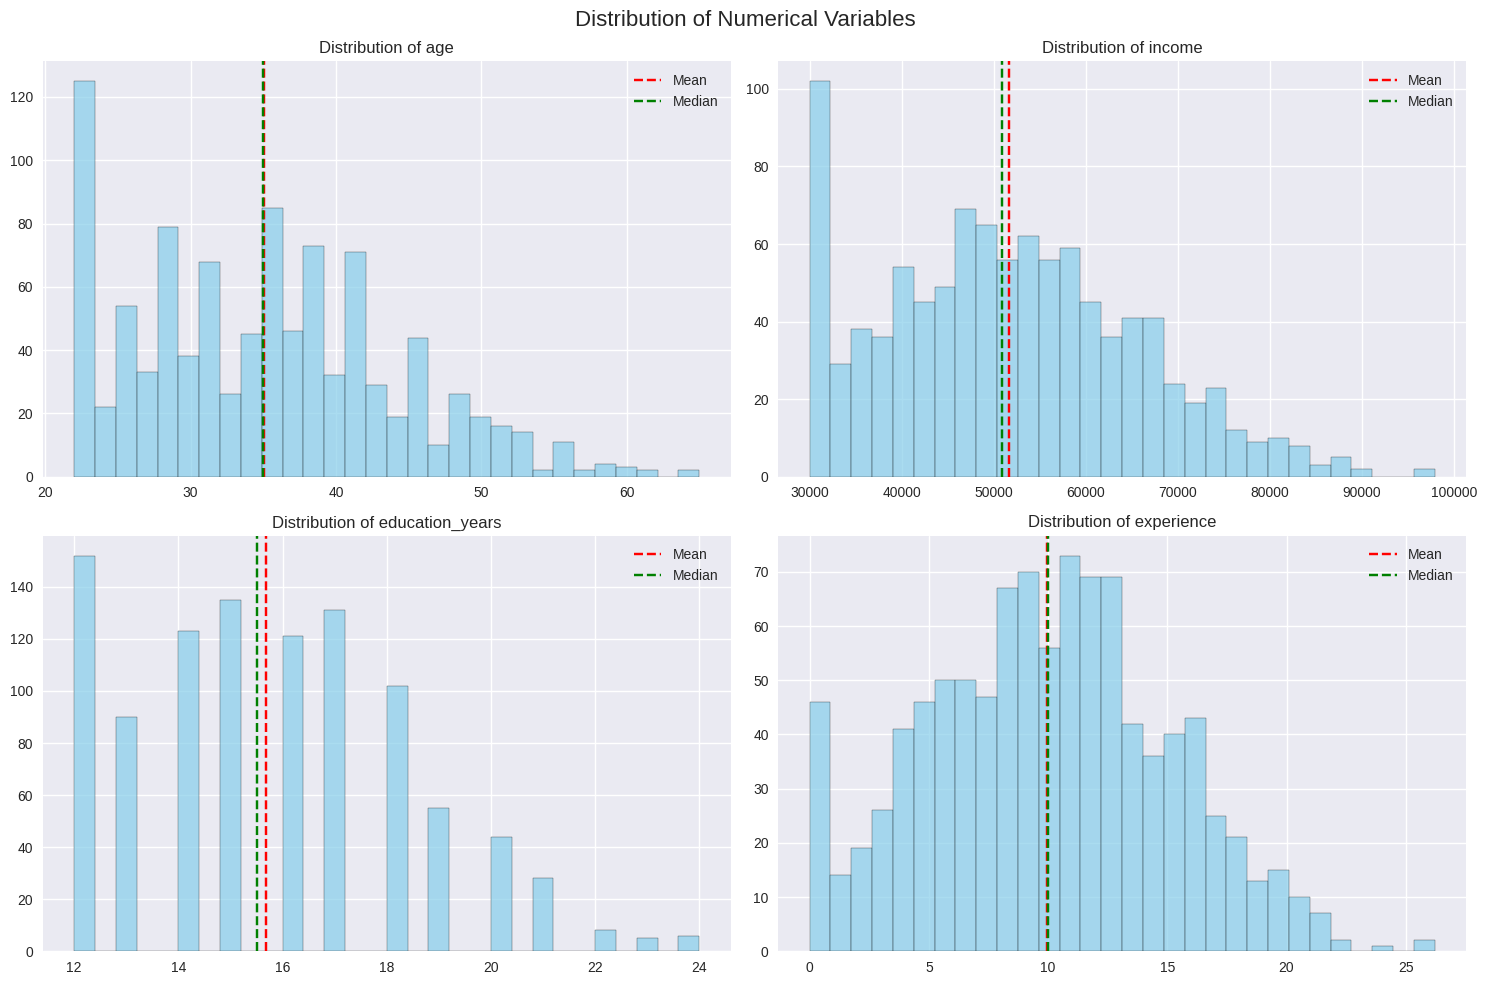

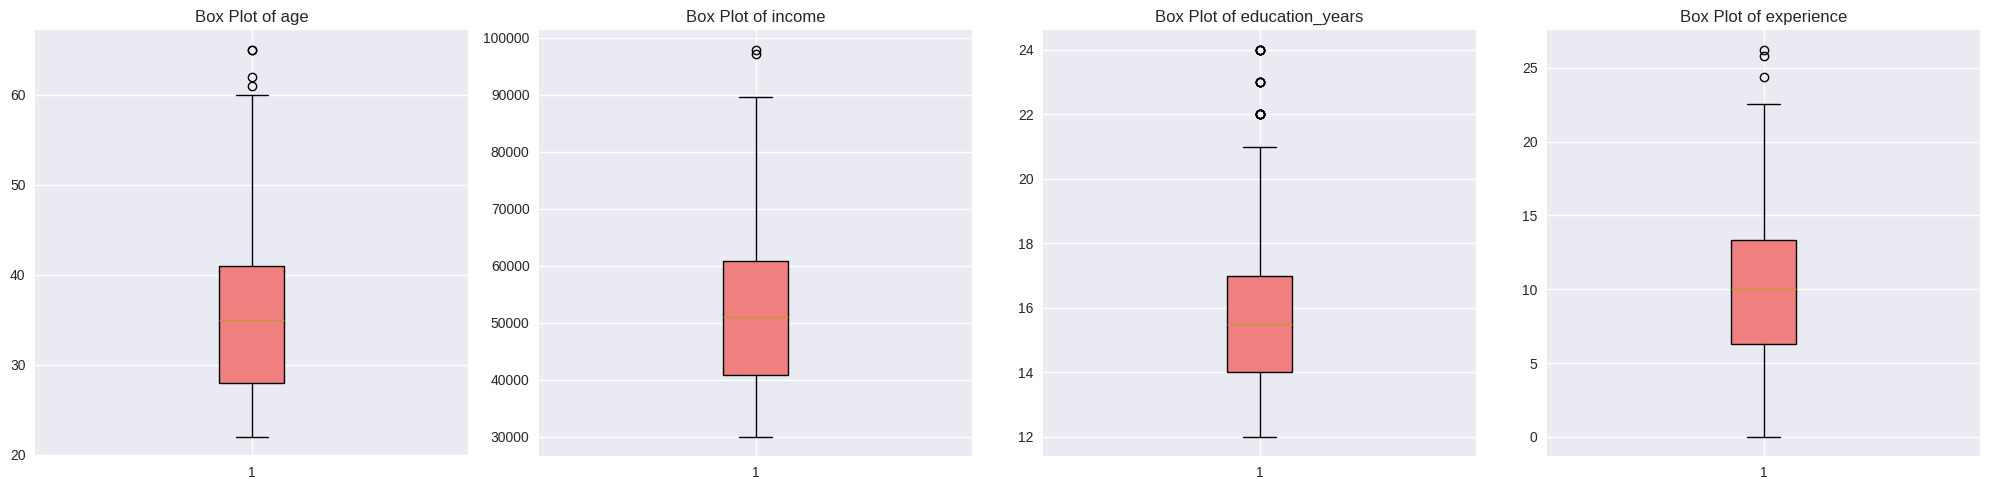

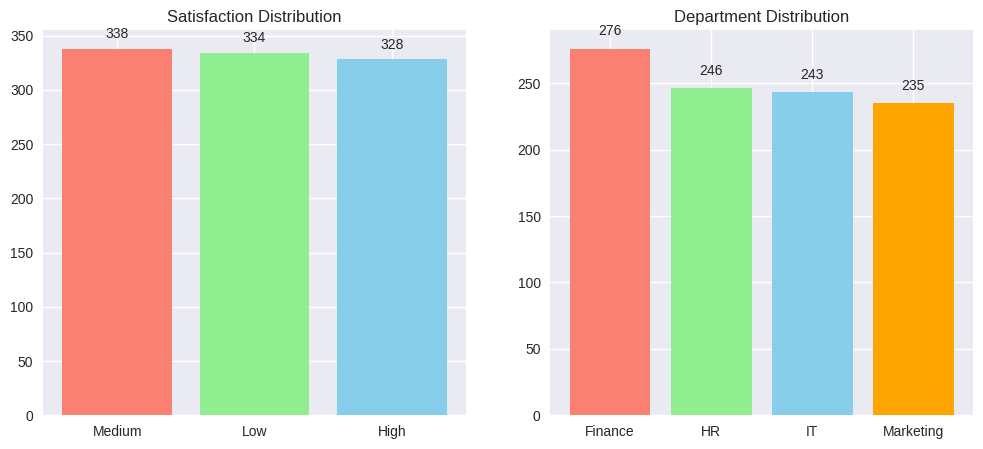


Correlation Matrix:
                    age  income  education_years  experience
age              1.000  -0.052            0.024      -0.009
income          -0.052   1.000           -0.008      -0.060
education_years  0.024  -0.008            1.000       0.020
experience      -0.009  -0.060            0.020       1.000


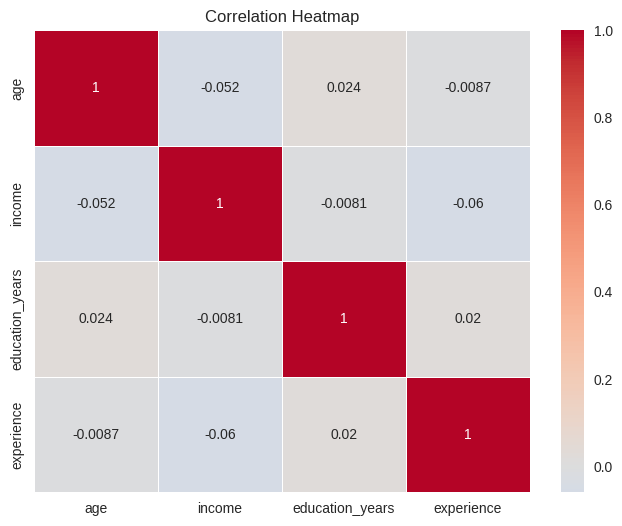

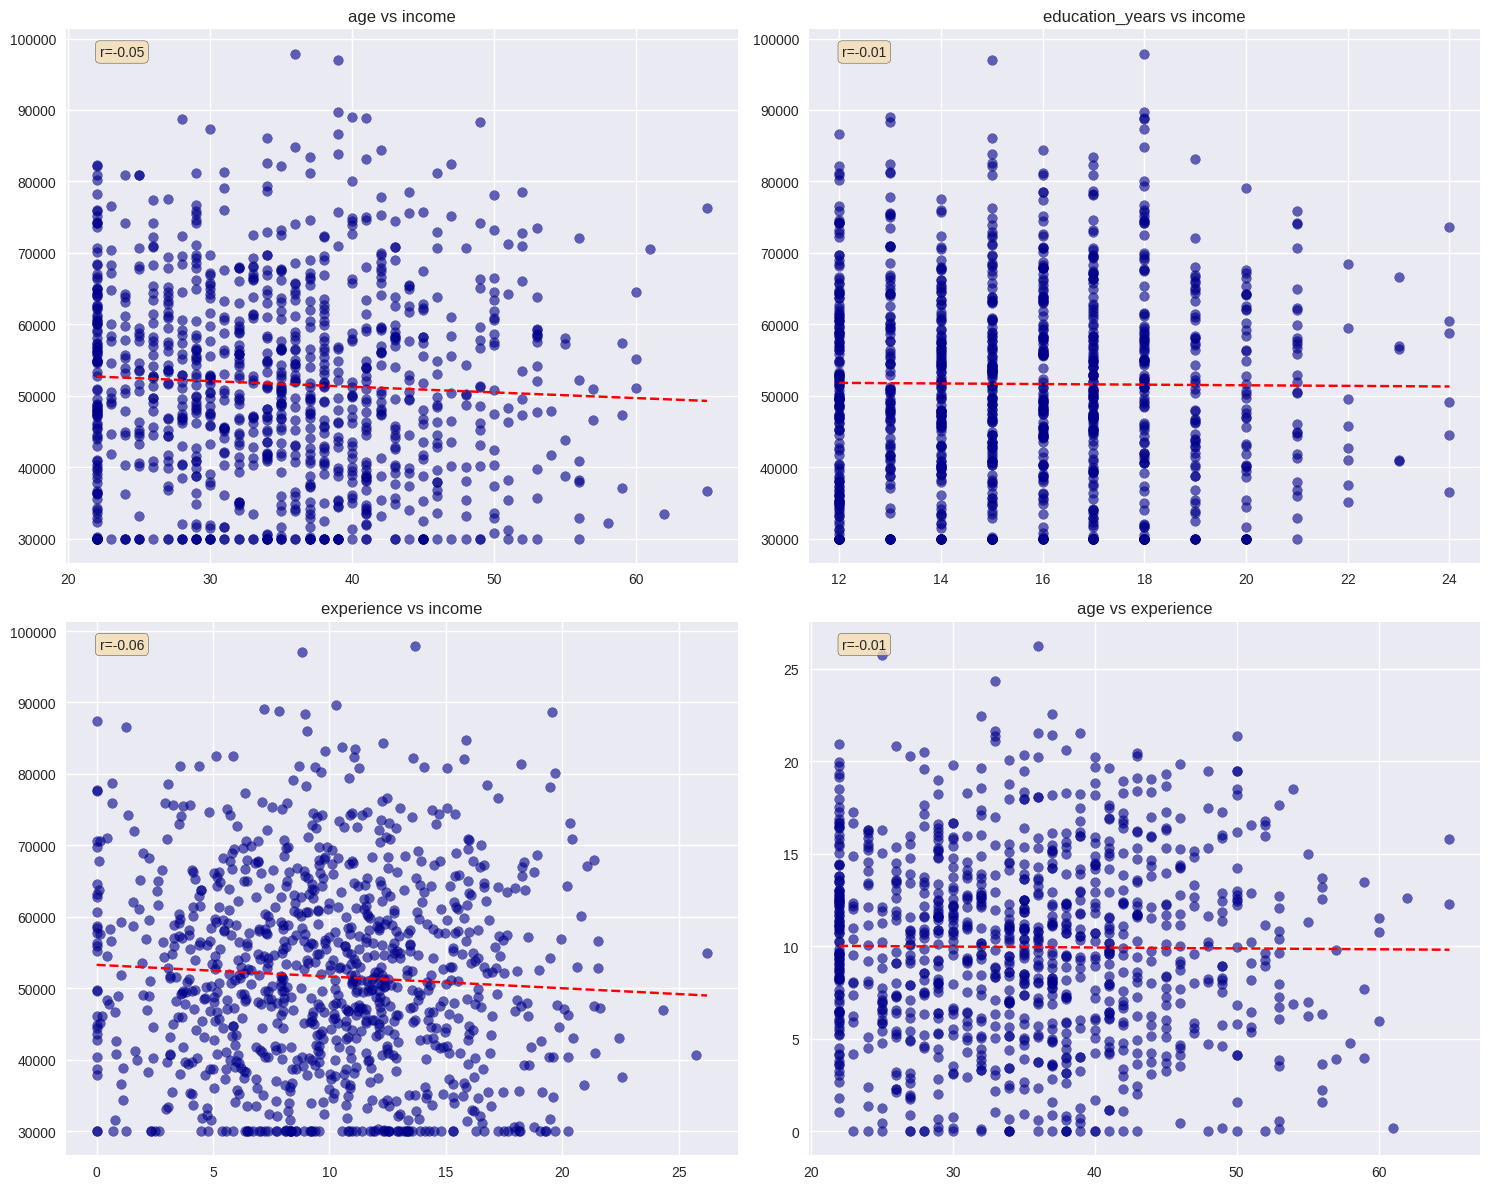

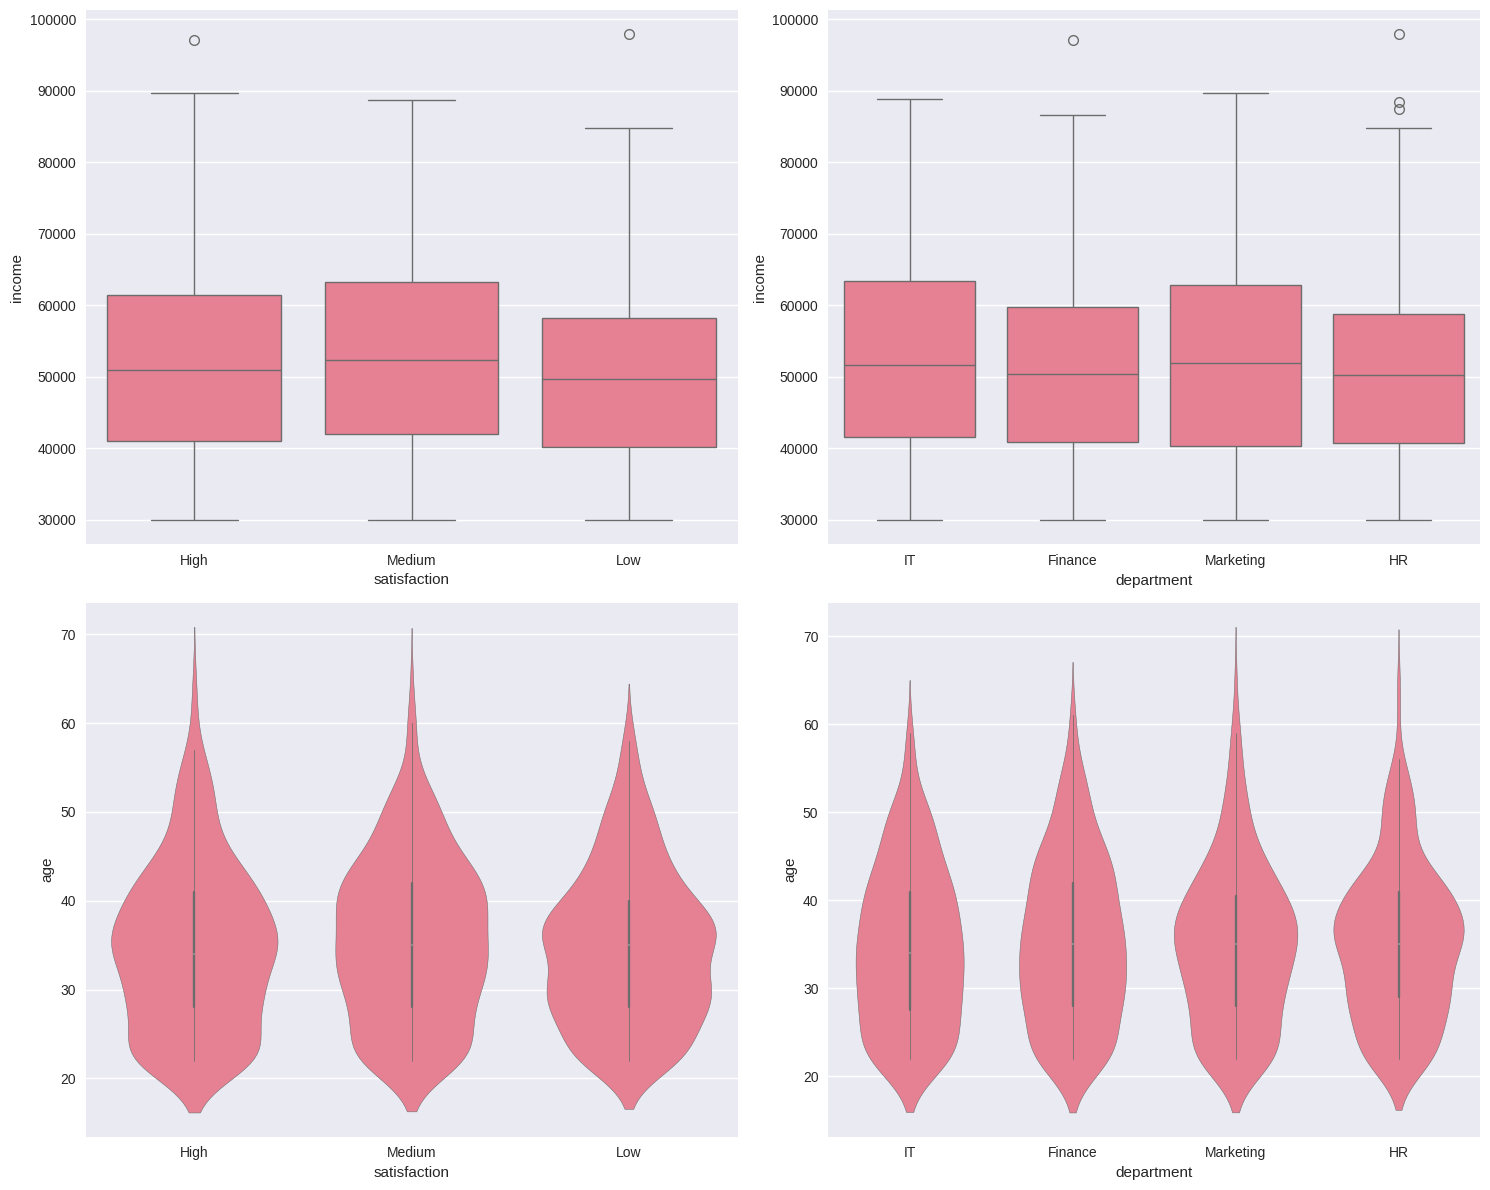

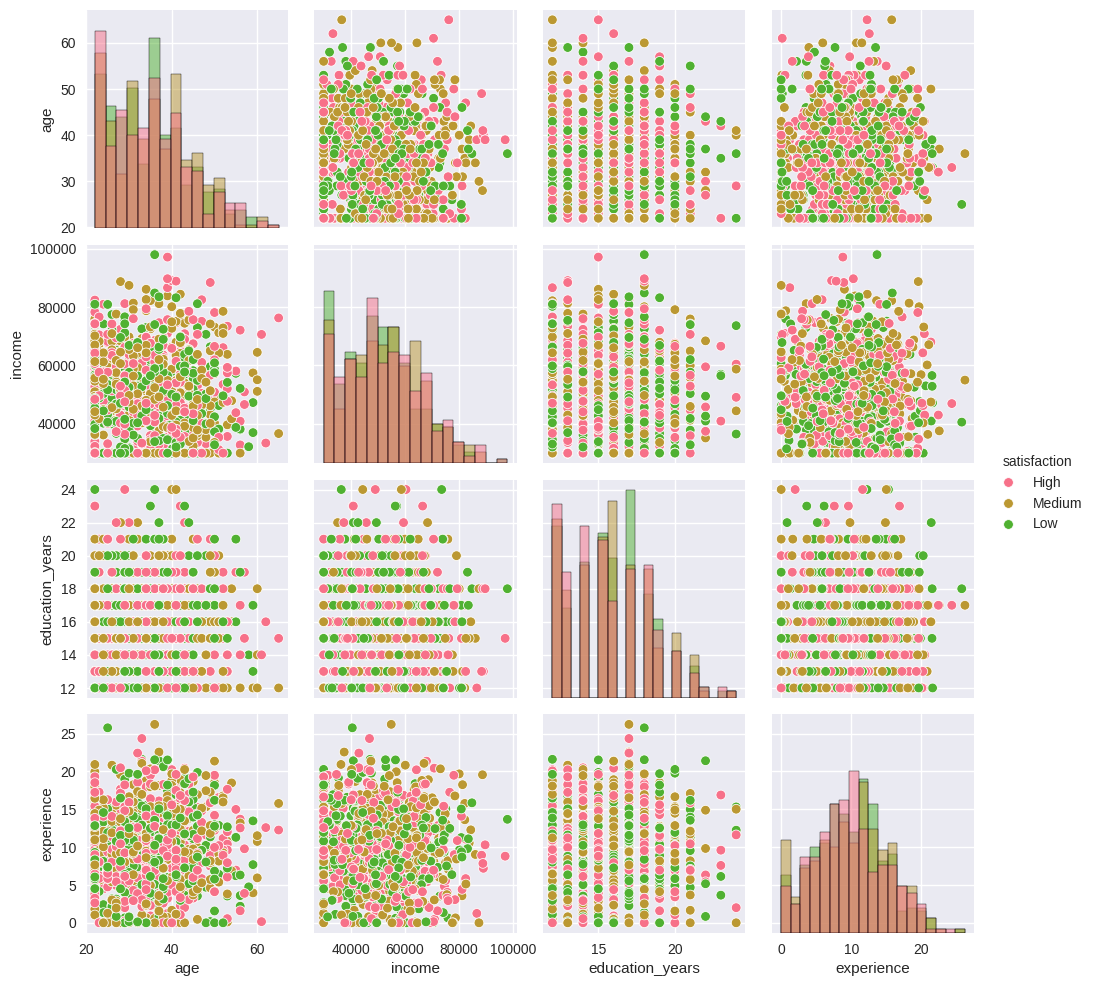

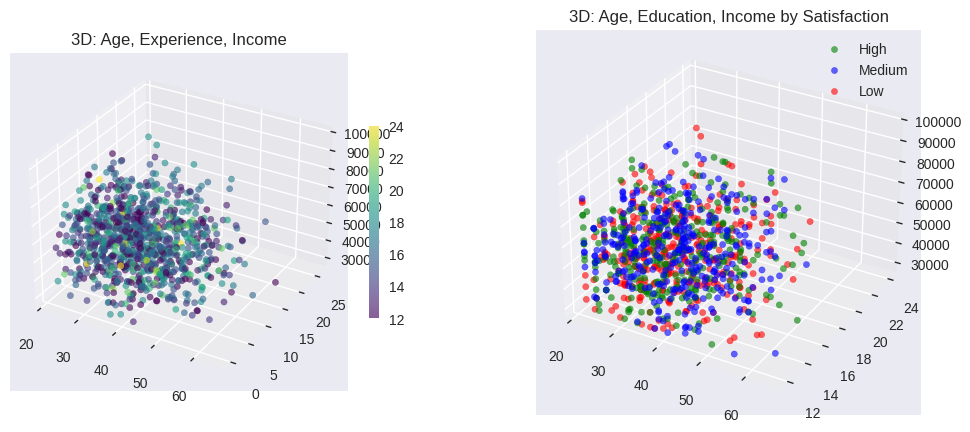

ANOVA (Satisfaction vs Income): F=2.7572, p=0.0640
Chi-square (Satisfaction vs Department): Chi2=8.7448, p=0.1884
Pearson (Education vs Income): r=-0.0081, p=0.7973

Outlier Analysis (IQR method):
- age: 4 outliers (0.4%)
- income: 2 outliers (0.2%)
- education_years: 19 outliers (1.9%)
- experience: 3 outliers (0.3%)

EDA SUMMARY INSIGHTS
1. Average income: $51,639
2. Income range: $30,000 - $97,897
3. Strongest correlation with income: experience (r = 0.06)
4. Most common satisfaction level: Medium
5. Department with highest average income: Marketing
6. Variable with most outliers: education_years (19 outliers)


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a sample dataset
np.random.seed(42)
n_samples = 1000
data = {
    'age': np.random.normal(35, 10, n_samples).astype(int),
    'income': np.random.normal(50000, 15000, n_samples),
    'education_years': np.random.normal(16, 3, n_samples),
    'experience': np.random.normal(10, 5, n_samples),
    'satisfaction': np.random.choice(['Low', 'Medium', 'High'], n_samples),
    'department': np.random.choice(['IT', 'Finance', 'HR', 'Marketing'], n_samples)
}
# Ensure realistic values
data['age'] = np.clip(data['age'], 22, 65)
data['income'] = np.clip(data['income'], 30000, 120000)
data['education_years'] = np.clip(data['education_years'], 12, 24).astype(int)
data['experience'] = np.clip(data['experience'], 0, 40)

df = pd.DataFrame(data)

# Dataset overview
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst 5 rows:\n{df.head()}")

# ======================================================
# 1. UNIVARIATE ANALYSIS
# ======================================================
numerical_cols = ['age', 'income', 'education_years', 'experience']

print("\nDescriptive Statistics:")
print(df[numerical_cols].describe())
print(f"\nMissing values:\n{df.isnull().sum()}")

# Histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)
for i, col in enumerate(numerical_cols):
    row, col_idx = i // 2, i % 2
    axes[row, col_idx].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col_idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean')
    axes[row, col_idx].axvline(df[col].median(), color='green', linestyle='--', label=f'Median')
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].legend()
plt.tight_layout()
plt.show()

# Box plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, col in enumerate(numerical_cols):
    box = axes[i].boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor('lightcoral')
    axes[i].set_title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Categorical distributions
categorical_cols = ['satisfaction', 'department']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts()
    axes[i].bar(counts.index, counts.values, color=['salmon','lightgreen','skyblue','orange'])
    axes[i].set_title(f'{col.title()} Distribution')
    for j, v in enumerate(counts.values):
        axes[i].text(j, v+10, str(v), ha='center')
plt.show()

# ======================================================
# 2. BIVARIATE ANALYSIS
# ======================================================
corr_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", corr_matrix.round(3))

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
relationships = [('age','income'), ('education_years','income'), ('experience','income'), ('age','experience')]
for i, (x,y) in enumerate(relationships):
    row, col = i//2, i%2
    axes[row,col].scatter(df[x], df[y], alpha=0.6, color='darkblue')
    z = np.polyfit(df[x], df[y], 1)
    p = np.poly1d(z)
    axes[row,col].plot(df[x].sort_values(), p(df[x].sort_values()), "r--")
    corr = df[x].corr(df[y])
    axes[row,col].text(0.05,0.95,f'r={corr:.2f}', transform=axes[row,col].transAxes,
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    axes[row,col].set_title(f'{x} vs {y}')
plt.tight_layout()
plt.show()

# Categorical vs numerical
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(x='satisfaction', y='income', data=df, ax=axes[0,0])
sns.boxplot(x='department', y='income', data=df, ax=axes[0,1])
sns.violinplot(x='satisfaction', y='age', data=df, ax=axes[1,0])
sns.violinplot(x='department', y='age', data=df, ax=axes[1,1])
plt.tight_layout()
plt.show()

# ======================================================
# 3. MULTIVARIATE ANALYSIS
# ======================================================
sns.pairplot(df[numerical_cols+['satisfaction']], hue='satisfaction', diag_kind='hist')
plt.show()

# 3D scatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121, projection='3d')
sc = ax1.scatter(df['age'], df['experience'], df['income'],
                 c=df['education_years'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, ax=ax1, shrink=0.5)
ax1.set_title("3D: Age, Experience, Income")

ax2 = fig.add_subplot(122, projection='3d')
colors={'Low':'red','Medium':'blue','High':'green'}
for level in df['satisfaction'].unique():
    mask = df['satisfaction']==level
    ax2.scatter(df.loc[mask,'age'], df.loc[mask,'education_years'], df.loc[mask,'income'],
                c=colors[level], label=level, alpha=0.6)
ax2.legend()
ax2.set_title("3D: Age, Education, Income by Satisfaction")
plt.show()

# ======================================================
# STATISTICAL TESTS
# ======================================================
# ANOVA
groups = [g['income'].values for _, g in df.groupby('satisfaction')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA (Satisfaction vs Income): F={f_stat:.4f}, p={p_val:.4f}")

# Chi-square
chi2, p_chi2, dof, expected = stats.chi2_contingency(pd.crosstab(df['satisfaction'], df['department']))
print(f"Chi-square (Satisfaction vs Department): Chi2={chi2:.4f}, p={p_chi2:.4f}")

# Pearson correlation
r, p = pearsonr(df['education_years'], df['income'])
print(f"Pearson (Education vs Income): r={r:.4f}, p={p:.4f}")

# ======================================================
# OUTLIER ANALYSIS
# ======================================================
def detect_outliers_iqr(data, col):
    Q1, Q3 = data[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    return data[(data[col]<lower)|(data[col]>upper)].shape[0]

print("\nOutlier Analysis (IQR method):")
for col in numerical_cols:
    n = detect_outliers_iqr(df,col)
    print(f"- {col}: {n} outliers ({n/len(df)*100:.1f}%)")
# ======================================================
# SUMMARY INSIGHTS
# ======================================================
print("\n" + "="*50)
print("EDA SUMMARY INSIGHTS")
print("="*50)

# 1. Average income
avg_income = df['income'].mean()

# 2. Income range
income_min, income_max = df['income'].min(), df['income'].max()

# 3. Strongest correlation with income
corr_with_income = corr_matrix['income'].abs().sort_values(ascending=False)
strongest_corr = corr_with_income.index[1]   # skip 'income' itself

# 4. Most common satisfaction level
common_satisfaction = df['satisfaction'].mode().iloc[0]

# 5. Department with highest average income
top_dept = df.groupby('department')['income'].mean().idxmax()

# Print insights
print(f"1. Average income: ${avg_income:,.0f}")
print(f"2. Income range: ${income_min:,.0f} - ${income_max:,.0f}")
print(f"3. Strongest correlation with income: {strongest_corr} "
      f"(r = {corr_with_income[strongest_corr]:.2f})")
print(f"4. Most common satisfaction level: {common_satisfaction}")
print(f"5. Department with highest average income: {top_dept}")

# Extra: Outlier summary
outlier_summary = {col: detect_outliers_iqr(df, col) for col in numerical_cols}
most_outliers = max(outlier_summary, key=outlier_summary.get)
print(f"6. Variable with most outliers: {most_outliers} "
      f"({outlier_summary[most_outliers]} outliers)")
